# Rules

- Internet and Books are ALLOWED
- Name your file as following: StudentID_ChineseName/EnglishName_quiz# 
- Extension of your file or your file type should be .py .
- If MOSS (Measure of Software Similarity) detects that any two files have more than 50% similarity, both students will get 0 for this quiz (We give it a base code that everyone has, so no need to worry about that)
- If you submit the code within an hour you will get the full score. Otherwise, you will have 24 hours to finish it and you will get 80% of your final score.

#Problem 1

#Instructions
- Do a few probability and density calculations for a normal distribution.  
- Calculate and plot the likelihood of a sample of just 3 observations.
- Determine the Maximum Likelihood Estimates.

 Let $$X \sim \mathcal{N}(\mu,\,\sigma^{2})$$  
 Determine $$P(X \geq t)$$

(a) Let $X \sim \mathcal{N}(500,\,75^{2})$ . Determine $P(X \geq 600)$

Use norm.cdf from scipy.stats to find $P(X \geq 600)$. **Print it out**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from scipy.stats import norm

In [12]:
prob = 1-norm.cdf(600, 500, 75)
prob

0.09121121972586788

(b) **Plot** the normal distribution of $X∼N(500,75^{2})$

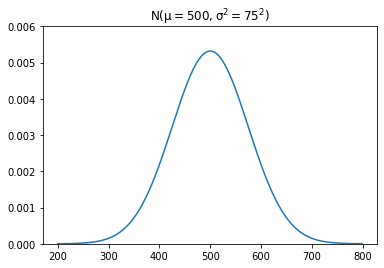

In [13]:
# define parameters
mu = 500
sigma = 75

# the 'dummy' x for plotting
x = np.arange(200,800)

# calculate the normal distribution at each value of x
prob = norm.pdf(x, mu, sigma)

# plot it
plt.plot(x, prob)
plt.title(r'$\mathrm{N(\mu=500, \sigma^2=75^2)}$')
plt.ylim((0,0.006))
plt.show()

(c) Calculating simple likelihoods

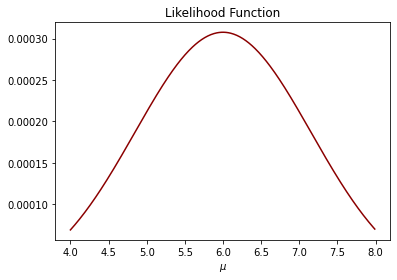

In [14]:
### edTest(test_likelihood) ###
# define the data set
x = [3,5,10]

# sigma is known to be 2, an estimate for mu
# is what we need to determine. Consider 
#the values (4, 4.01, 4.02, ..., 7.99).
sigma = 2
mu = np.arange(4, 8, 0.01)

# calculate the likelihood
like = norm.pdf(x[0],mu,sigma)*norm.pdf(x[1],mu,sigma)*norm.pdf(x[2],mu,sigma)

#plot it
plt.plot(mu,like,color="darkred");
plt.title('Likelihood Function')
plt.xlabel(r'$\mu$')
plt.show()

(d) Determine the maximum likelihood estimate for $\mu$. Print it out.

In [15]:
### edTest(test_mle) ###
# determine which value of mu aligns with where 
# the maximum of the likelihood function is
mle = mu[np.argmax(like)]
mle

5.999999999999957

(e) Find the CDF from the PDF figure that you obtained. Use **prob** in (b) to find $P(X \geq 600)$

Hint: CDF is the **sum** of the PDF up to certain value. 

In this case, your PDF is the variable **prob** in (b). Your answer should be similar to (a). 

In [34]:
cdf_prob = 1 - prob[:600 - 200].sum()
cdf_prob

0.09233864691132143

(f) Plot your CDF

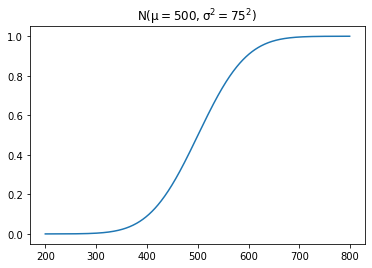

In [36]:
# Your code here

x = np.arange(200,800)
cdf = [prob[:i - 200].sum() for i in range(200, 800)]

plt.plot(x, cdf)
plt.title(r'$\mathrm{N(\mu=500, \sigma^2=75^2)}$')
plt.show()

Question: How would you numerically maximize this function if both the mean and variance were unknown? How would you visualize the likelihood function?

Answer: Search both mu and sigma by declare two possible value arrays, and visualize this 2D likelihood function as heat map where colors on the graph indicates likelihood value.

#Problem 2

# Description

- Define a function bootstrap that takes a dataframe as the input. Use NumPy's random.randint() function to generate random integers in the range of the length of the dataset. These integers will be used as the indices to access the rows of the dataset.

- Compute the $β_{0}$ and $β_{1}$ values for each instance of the dataframe.

- Plot the $β_{0}$, $β_{1}$ histograms.

# Hints:
To compute the beta values use the following equations:

$$β_{0} = \bar{y} - (b_{1} * \bar{x})$$

$$β_{1} = \frac{Σ(x - \bar{x}) * (y - \bar{y})}{Σ(x - \bar{x})^{2}}$$

where $\bar{x}$ is the mean of x and $\bar{y}$ is the mean of y

np.random.randint() : Returns list of integers as per mentioned size

np.dot() : Computes the dot product of two arrays


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read the file "Advertising_csv"
df = pd.read_csv('Advertising_adj.csv', index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [8]:
# Define a bootstrap function, which inputs a dataframe & outputs a bootstrapped dataframe
def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df

In [13]:
# Create two empty lists to store beta values
beta0_list, beta1_list = [],[]


# For each instance of the for loop, call your bootstrap function, calculate the beta values
# Store the beta values in the appropriate list

#Choose the number of "parallel" Universes to generate the new dataset
number_of_bootstraps = 1000

for i in range(number_of_bootstraps):
    df_new = bootstrap(df)

# x is the predictor variable given by 'tv' values 
# y is the response variable given by 'sales' values
    x = df_new['TV']
    y = df_new['sales']

#Find the mean of x
    xmean = x.mean()

#Find the mean of y
    ymean = y.mean()
    
# Using equations given and discussed in lecture compute the beta0 and beta1 values
# Hint: use np.dot to perform the multiplication operation
    beta1 = ( (x-xmean)*(y-ymean) ).sum() / ( (x-xmean)*(x-xmean) ).sum()
    beta0 = ymean - beta1 * xmean

# Append the calculated values of beta1 and beta0
    beta0_list.append(beta0)
    beta1_list.append(beta1)

In [16]:
### edTest(test_beta) ###

#Compute the mean of the beta0 and beta1 lists
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)

Text(0, 0.5, 'Frequency')

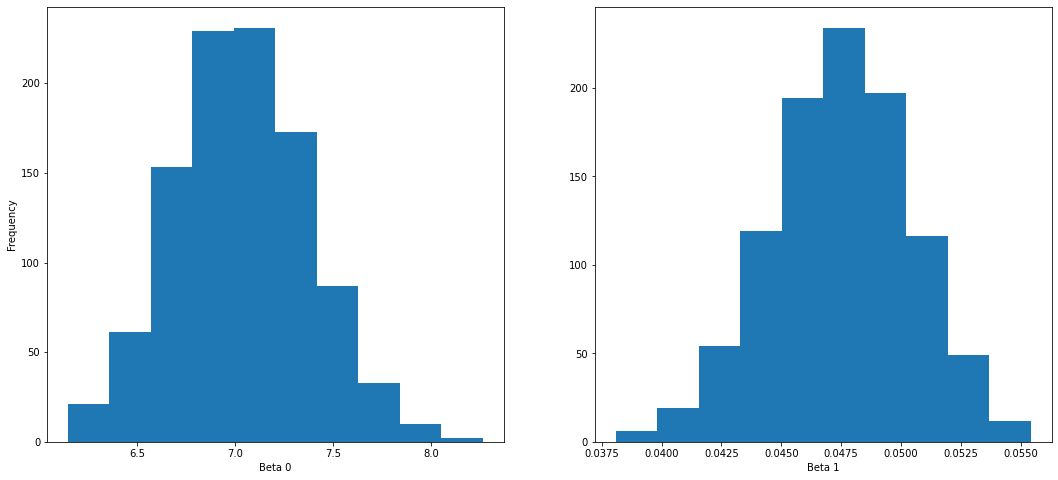

In [18]:
# plot histogram of beta0 and beta1
fig, ax = plt.subplots(1, 2, figsize=(18,8))
ax[0].hist(beta0_list)
ax[1].hist(beta1_list)
ax[0].set_xlabel('Beta 0')
ax[1].set_xlabel('Beta 1')
ax[0].set_ylabel('Frequency')

# Problem 3

# Description

The goal of this exercise is to create a plot like the one given below for $β_{0}$ and $β_{1}$ with its confidence interval

Note: It is going to look SIMILAR, but probably not the same

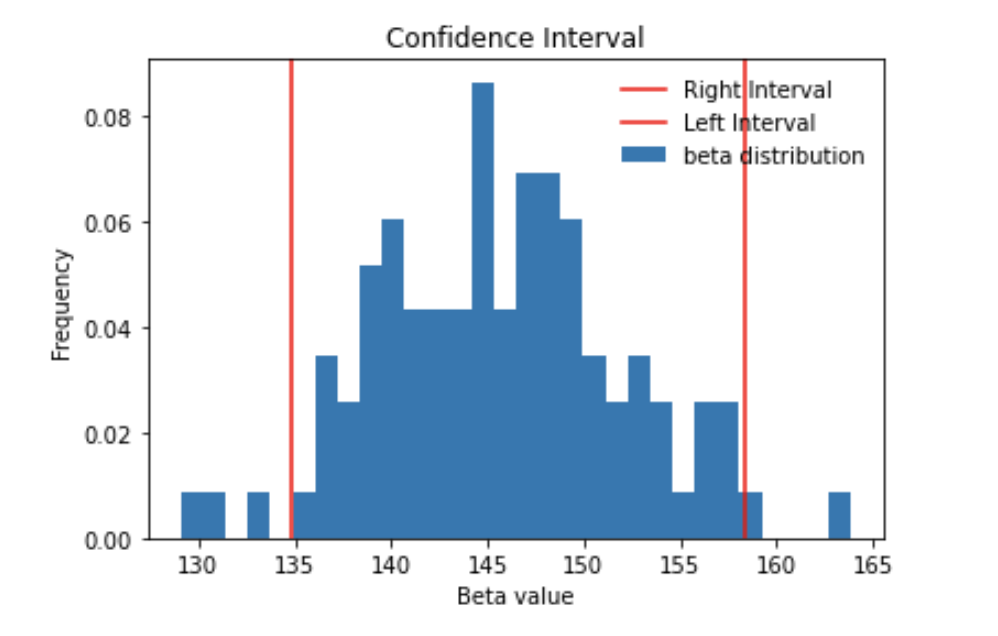

#Instructions
- Follow the steps from the previous exercise to get the lists of beta values.
- Sort the list of beta values (from low to high).  
- To compute the 95% confidence interval, find the 2.5 percentile and the 97.5 percentile using np.percentile()
- Use the helper code plot_simulation() to visualise the β values along with its confidence interval


# Hints:
np.random.randint() : Returns list of integers as per mentioned size

df.iloc[] : Purely integer-location based indexing for selection by position

plt.hist() : Plots a histogram

ndarray.sort() :Returns the sorted ndarray.

np.percentile(list, q) : Returns the q-th percentile value based on the provided ascending list of values

In [21]:
# Read the 'Advertising_adj.csv' file
df = pd.read_csv('Advertising_adj.csv', index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [ ]:
# Use your bootstrap function from the previous exercise


In [25]:
# Like last time, create a list of beta values using 100 bootstraps of your original data
beta0_list, beta1_list = [],[]

numberOfBootstraps = 100

for i in range(numberOfBootstraps):
    df_new = bootstrap(df)
    
    xmean = df_new.TV.mean()
    ymean = df_new.sales.mean()
    
    beta1 = np.dot((df_new.TV-xmean) , (df_new.sales-ymean))/((df_new.TV-xmean)**2).sum()
    beta0 = ymean - beta1*xmean
    
    beta0_list.append(beta0)
    beta1_list.append(beta1)

In [29]:
### edTest(test_sort) ###

# Sort the two lists of beta values  from lowest value to highest 
beta0_list.sort()
beta1_list.sort()

6.4300143253626585

In [30]:
### edTest(test_beta) ###

# Now we find the confidence interval
# Find the 95% percent confidence interval using the percentile function
beta0_CI = (np.percentile(beta0_list, 2.5) , np.percentile(beta0_list, 97.5))

beta1_CI = (np.percentile(beta1_list, 2.5) , np.percentile(beta1_list, 97.5))

In [31]:
#Print the confidence interval of beta0 upto 3 decimal points
print(f'The beta0 confidence interval is {beta0_CI}')

The beta0 confidence interval is (6.4300143253626585, 7.617162253347283)


In [32]:
#Print the confidence interval of beta1 upto 3 decimal points
print(f'The beta1 confidence interval is {beta1_CI}')

The beta1 confidence interval is (0.04228234271782519, 0.052267601894777346)


In [33]:
# Use this helper function to plot the histogram of beta values along with the 95% confidence interval
def plot_simulation(simulation, confidence):
    plt.hist(simulation, bins = 30, label = 'beta distribution', align = 'left', density = True)
    plt.axvline(confidence[1], 0, 1, color = 'r', label = 'Right Interval')
    plt.axvline(confidence[0], 0, 1, color = 'red', label = 'Left Interval')
    plt.xlabel('Beta value')
    plt.ylabel('Frequency')
    plt.title('Confidence Interval')
    plt.legend(frameon = False, loc = 'upper right')

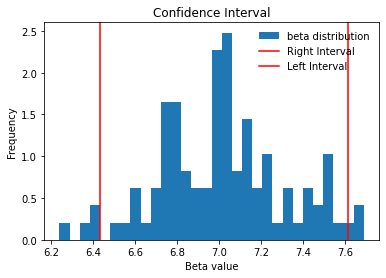

In [34]:
# Plot for beta 0
plot_simulation(beta0_list, beta0_CI)

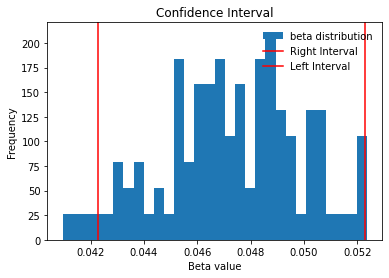

In [35]:
#Plot for beta 1
plot_simulation(beta1_list, beta1_CI)